In [1]:
#working in geopandas - import the module
import geopandas as gpd

In [2]:
#import first dataset (LA parks) and take a quick look
parks=gpd.read_file('data/LA_Parks_Information.geojson')
parks.head()

,name,shape_area,objectid,park_id,name_alpha,shape_leng,area_acres,issubpark,region,address,name_publi,park_class,cd_real,geometry
0,Robert F Kennedy Inspiration Memorial Park,6501.37488025,1,1056,ROBERT F KENNEDY PARK (LAUSD) JUA,641.47054538,0.149251627315,N,M,"3400 W Wilshire Blvd, LA 90010",Kennedy (Robert F) Inspiration Memorial Park (...,N,10,"MULTIPOLYGON (((-118.29796 34.06162, -118.2969..."
1,Sycamore Grove Park,691462.199493,2,736,SYCAMORE GROVE PARK,6227.3991903,15.8738513625,N,M,"4702 N Figueroa St, LA 90042",Sycamore Grove Park,C,01,"MULTIPOLYGON (((-118.20110 34.10134, -118.2011..."
2,San Pedro Welcome Park,17402.1579777,3,328,SAN PEDRO WELCOME PARK,560.372862441,0.399500174163,N,P,"451 N Gaffey St, San Pedro 90731",Formerly Welcome Park,N,15,"MULTIPOLYGON (((-118.29286 33.74600, -118.2928..."
3,Country Club Heritage Park,3647.84860118,4,1045,COUNTRY CLUB PARK HERITAGE PLAZA,287.523337381,0.0837434158085,N,M,"1015 S Wilton Pl, LA 90018",AKA Wilton Place Park,N,10,"MULTIPOLYGON (((-118.31504 34.05232, -118.3149..."
4,Watts Cultural Crescent,128793.355722,5,1046,WATTS CULTURAL CRESCENT,2852.11033344,2.95670043382,N,P,"1780 E Santa Ana Blvd, LA 90002",AKA Watts Towers Cultural Cresent,N,15,"MULTIPOLYGON (((-118.24221 33.93945, -118.2422..."


In [3]:
columns_to_drop = ['name_alpha','issubpark','name_publi']
parks = parks.drop(columns_to_drop,axis=1)
parks.head()

,name,shape_area,objectid,park_id,shape_leng,area_acres,region,address,park_class,cd_real,geometry
0,Robert F Kennedy Inspiration Memorial Park,6501.37488025,1,1056,641.47054538,0.149251627315,M,"3400 W Wilshire Blvd, LA 90010",N,10,"MULTIPOLYGON (((-118.29796 34.06162, -118.2969..."
1,Sycamore Grove Park,691462.199493,2,736,6227.3991903,15.8738513625,M,"4702 N Figueroa St, LA 90042",C,01,"MULTIPOLYGON (((-118.20110 34.10134, -118.2011..."
2,San Pedro Welcome Park,17402.1579777,3,328,560.372862441,0.399500174163,P,"451 N Gaffey St, San Pedro 90731",N,15,"MULTIPOLYGON (((-118.29286 33.74600, -118.2928..."
3,Country Club Heritage Park,3647.84860118,4,1045,287.523337381,0.0837434158085,M,"1015 S Wilton Pl, LA 90018",N,10,"MULTIPOLYGON (((-118.31504 34.05232, -118.3149..."
4,Watts Cultural Crescent,128793.355722,5,1046,2852.11033344,2.95670043382,P,"1780 E Santa Ana Blvd, LA 90002",N,15,"MULTIPOLYGON (((-118.24221 33.93945, -118.2422..."


In [4]:
parks.columns = ['name',
 'area_sf',
 'object_id',
 'park_id',
 'shape_leng',
 'area_acres',
 'region',
 'address',
 'class',
 'cd',
 'geometry']
parks.head()

,name,area_sf,object_id,park_id,shape_leng,area_acres,region,address,class,cd,geometry
0,Robert F Kennedy Inspiration Memorial Park,6501.37488025,1,1056,641.47054538,0.149251627315,M,"3400 W Wilshire Blvd, LA 90010",N,10,"MULTIPOLYGON (((-118.29796 34.06162, -118.2969..."
1,Sycamore Grove Park,691462.199493,2,736,6227.3991903,15.8738513625,M,"4702 N Figueroa St, LA 90042",C,01,"MULTIPOLYGON (((-118.20110 34.10134, -118.2011..."
2,San Pedro Welcome Park,17402.1579777,3,328,560.372862441,0.399500174163,P,"451 N Gaffey St, San Pedro 90731",N,15,"MULTIPOLYGON (((-118.29286 33.74600, -118.2928..."
3,Country Club Heritage Park,3647.84860118,4,1045,287.523337381,0.0837434158085,M,"1015 S Wilton Pl, LA 90018",N,10,"MULTIPOLYGON (((-118.31504 34.05232, -118.3149..."
4,Watts Cultural Crescent,128793.355722,5,1046,2852.11033344,2.95670043382,P,"1780 E Santa Ana Blvd, LA 90002",N,15,"MULTIPOLYGON (((-118.24221 33.93945, -118.2422..."


In [5]:
# I'll want to sort these by size later, but area_acres and area_sf are strings
# Make them floats.
parks['area_acres'] = parks['area_acres'].astype(float)
parks['area_sf'] = parks['area_sf'].astype(float)

In [6]:
# import second data set, 311 service reqs for encampments.
encamp_2017 = gpd.read_file('data/2017-311_Homeless_Encampment_Requests_raw.csv')

In [7]:
# this one has a lot of columns. let's rename some. First list them.
columns = list(encamp_2017)
columns

['SRNumber',
 'CreatedDate',
 'UpdatedDate',
 'ActionTaken',
 'Owner',
 'RequestType',
 'Status',
 'RequestSource',
 'MobileOS',
 'Anonymous',
 'AssignTo',
 'ServiceDate',
 'ClosedDate',
 'AddressVerified',
 'ApproximateAddress',
 'Address',
 'HouseNumber',
 'Direction',
 'StreetName',
 'Suffix',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Location',
 'TBMPage',
 'TBMColumn',
 'TBMRow',
 'APC',
 'CD',
 'CDMember',
 'NC',
 'NCName',
 'PolicePrecinct',
 'geometry']

In [8]:
# Then copy and paste to rename.
encamp_2017.columns = ['req_num',
 'created_date',
 'updated_date',
 'action_taken',
 'owner',
 'req_type',
 'status',
 'req_source',
 'mobile',
 'anon',
 'assign_to',
 'serve_date',
 'closed_date',
 'add_verf',
 'aprox_add',
 'add',
 'house_num',
 'direction',
 'st_name',
 'suffix',
 'zip',
 'lat',
 'long',
 'loc',
 'TBMPage',
 'TBMColumn',
 'TBMRow',
 'apc',
 'cd',
 'cd_member',
 'nc',
 'nc_name',
 'police_precinct',
 'geometry']

In [9]:
#I need to convert lat & long to floats, but this dataset is weird
#I've had to remove empty values via excel
#let's make sure they're gone
encamp_2017_sorted = encamp_2017.sort_values(by='lat',ascending = True)
encamp_2017_sorted[['created_date','lat','long','loc']].head(10)

,created_date,lat,long,loc
3616,3/9/2017 10:07,33.70685495,-118.2892322,"(33.7068549518, -118.289232202)"
21854,11/6/2017 12:49,33.7098142,-118.2854935,"(33.709814199, -118.285493492)"
14560,8/13/2017 14:33,33.71119586,-118.2930418,"(33.7111958555, -118.293041832)"
15459,8/24/2017 9:46,33.71334069,-118.2897987,"(33.7133406932, -118.289798746)"
16046,8/31/2017 7:57,33.71334069,-118.2897987,"(33.7133406932, -118.289798746)"
16718,9/7/2017 17:06,33.71687011,-118.2883463,"(33.71687011, -118.288346318)"
767,1/16/2017 14:29,33.72070773,-118.2885934,"(33.7207077338, -118.288593449)"
9755,6/11/2017 11:38,33.72162025,-118.2924479,"(33.7216202536, -118.292447948)"
7711,5/11/2017 11:09,33.72186862,-118.2911356,"(33.7218686246, -118.291135597)"
6963,5/1/2017 20:10,33.72317585,-118.2908967,"(33.7231758495, -118.290896653)"


In [10]:
# Now let's drop the ones we don't need.
columns_to_drop = ['updated_date', 'action_taken', 'owner','req_type','status','req_source','mobile','assign_to','serve_date','closed_date','TBMPage','TBMColumn','TBMRow','cd_member','nc_name']
encamp_2017 = encamp_2017.drop(columns_to_drop,axis=1)
encamp_2017.head()

,req_num,created_date,anon,add_verf,aprox_add,add,house_num,direction,st_name,suffix,zip,lat,long,loc,apc,cd,nc,police_precinct,geometry
0,1-411100006,1/1/2017 10:30,Y,Y,,"1415 N MCCADDEN PL, 90028",1415,N,MCCADDEN,PL,90028,34.09658918,-118.3381616,"(34.0965891784, -118.338161593)",Central APC,13,32,HOLLYWOOD,None
1,1-411102191,1/1/2017 10:37,N,Y,N,"DAVID AVE AT VENICE BLVD, 90034",,,,,90034,34.03674605,-118.3755976,"(34.0367460536, -118.375597573)",South Los Angeles APC,10,60,WILSHIRE,None
2,1-411105133,1/1/2017 11:00,N,Y,,"3522 W 8TH ST, 90005",3522,W,8TH,ST,90005,34.05742408,-118.307502,"(34.0574240766, -118.307502018)",Central APC,10,55,OLYMPIC,None
3,1-411121146,1/1/2017 12:00,N,Y,,"761 E ROSE AVE, 90291",761,E,ROSE,AVE,90291,34.00109792,-118.4686821,"(34.0010979182, -118.468682061)",West Los Angeles APC,11,68,PACIFIC,None
4,1-411131621,1/1/2017 12:24,N,Y,N,"14650 W LASSEN ST, 91345",14650,W,LASSEN,ST,91345,34.25010497,-118.4509682,"(34.2501049681, -118.450968208)",North Valley APC,6,101,MISSION,None


In [11]:
#I'm missing the geometry I need to map in geopandas. Let's try to make it
# using the lat/long we do have
g_encamp_2017 = gpd.GeoDataFrame(
    encamp_2017, geometry=gpd.points_from_xy(encamp_2017.long, encamp_2017.lat))
encamp_2017.head()

,req_num,created_date,anon,add_verf,aprox_add,add,house_num,direction,st_name,suffix,zip,lat,long,loc,apc,cd,nc,police_precinct,geometry
0,1-411100006,1/1/2017 10:30,Y,Y,,"1415 N MCCADDEN PL, 90028",1415,N,MCCADDEN,PL,90028,34.09658918,-118.3381616,"(34.0965891784, -118.338161593)",Central APC,13,32,HOLLYWOOD,POINT (-118.33816 34.09659)
1,1-411102191,1/1/2017 10:37,N,Y,N,"DAVID AVE AT VENICE BLVD, 90034",,,,,90034,34.03674605,-118.3755976,"(34.0367460536, -118.375597573)",South Los Angeles APC,10,60,WILSHIRE,POINT (-118.37560 34.03675)
2,1-411105133,1/1/2017 11:00,N,Y,,"3522 W 8TH ST, 90005",3522,W,8TH,ST,90005,34.05742408,-118.307502,"(34.0574240766, -118.307502018)",Central APC,10,55,OLYMPIC,POINT (-118.30750 34.05742)
3,1-411121146,1/1/2017 12:00,N,Y,,"761 E ROSE AVE, 90291",761,E,ROSE,AVE,90291,34.00109792,-118.4686821,"(34.0010979182, -118.468682061)",West Los Angeles APC,11,68,PACIFIC,POINT (-118.46868 34.00110)
4,1-411131621,1/1/2017 12:24,N,Y,N,"14650 W LASSEN ST, 91345",14650,W,LASSEN,ST,91345,34.25010497,-118.4509682,"(34.2501049681, -118.450968208)",North Valley APC,6,101,MISSION,POINT (-118.45097 34.25010)


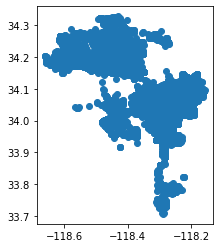

In [12]:
#it worked! Plot to see
g_encamp_2017.plot()

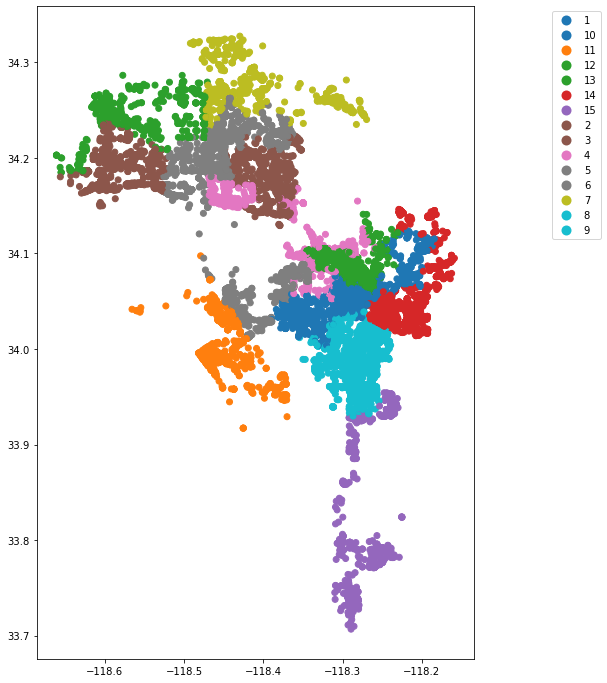

In [13]:
#I want to be able to use the "within" command
#This will let me narrow to encampment reqs within the park polygons
#but I'm getting an error that my indices are different
#and that projections are different. Let's reproject encampments to start.
g_encamp_2017=g_encamp_2017.set_crs("EPSG:4326")
g_encamp_2017.crs

#and replot to make sure things still look right
g_encamp_2017.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'cd',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }                  # this puts the legend to the side
) 

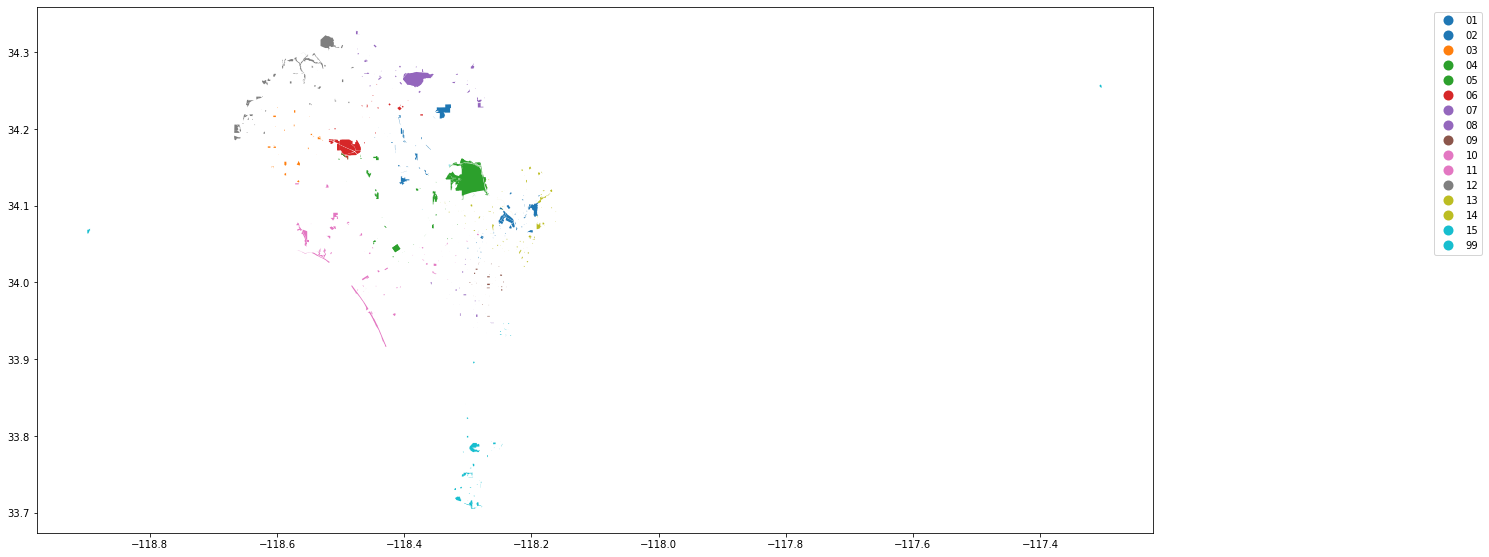

In [14]:
#lets try plotting parks
parks.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'cd',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }                  # this puts the legend to the side
) 

In [15]:
#remove outlier, Camp Seely
parks = parks.drop(545,axis=0)

<ipython-input-16-51b0cd38415e>:6: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parks['geometry']=parks.geometry.buffer(.001)


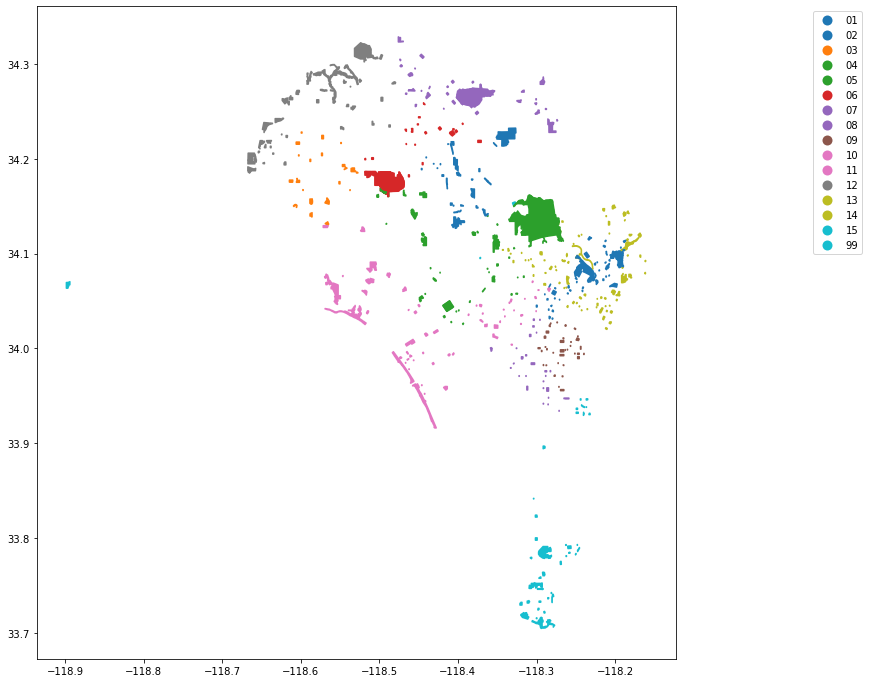

In [16]:
# Good. before spatial joining, we want to include a radius around the parks
# This is because many reports use approximate addresses.
# I'll use buffers to accomplish this.
# I took it out to not slow down the process, but I used a folium map 
# to determine the proper lat/long deg. this hits about a 1/2 block radius.
parks['geometry']=parks.geometry.buffer(.001)
parks.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'cd',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }                  # this puts the legend to the side
) 

In [17]:
# this raises 2 issues that I'm not going to worry about right now
# but want to fix down the line:
# 1. the original park geometry is gone
# 2. there are now overlapping polygons, so there will be double counts.

In [18]:
# now we can do a spatial join with the expanded parks
park_area_encamp_2017 = gpd.sjoin(parks, g_encamp_2017)

# drop columns
drop_columns = ['object_id','shape_leng','region','class','req_num','created_date','anon', 'add_verf', 'aprox_add', 'add', 'house_num', 'direction', 'st_name', 'suffix', 'zip', 'lat', 'long', 'loc', 'apc', 'cd_right','index_right']
park_area_encamp_2017 = park_area_encamp_2017.drop(drop_columns,axis=1)
park_area_encamp_2017.head()

# add frequency
park_area_encamp_2017['freq'] = park_area_encamp_2017['name'].map(park_area_encamp_2017['name'].value_counts())
park_area_encamp_2017.head()

#and dissolve
park_area_encamp_2017_diss = park_area_encamp_2017.dissolve(by='park_id')
park_area_encamp_2017_diss

,geometry,name,area_sf,area_acres,address,cd_left,nc,police_precinct,freq
park_id,,,,,,,,,
1004,"POLYGON ((-118.19185 34.08465, -118.19186 34.0...",Rose Hill Recreation Center,9.863366e+04,2.264326,"4530 N Mercury Ave, LA 90032",14,48,HOLLENBECK,1
1006,"POLYGON ((-118.21159 34.07456, -118.21160 34.0...",Lincoln Heights Youth Center,3.212911e+04,0.737586,"2911 N Altura St, LA 90031",01,47,HOLLENBECK,9
1008,"POLYGON ((-118.23918 34.05532, -118.23918 34.0...",El Pueblo de Los Angeles Historic Monument,8.836322e+04,2.028549,"845 N Alameda St, LA 90012",14,46,CENTRAL,9
1009,"POLYGON ((-118.47869 34.17657, -118.47891 34.1...",Sepulveda Basin Wildlife Reserve,8.083256e+06,185.566761,"6335 N Woodley Ave, LA 91406",06,19,WEST VALLEY,44
1010,"POLYGON ((-118.33026 33.98408, -118.33025 33.9...",11th Avenue Park,9.110645e+03,0.209152,"6116 S 11th Ave, LA 90043",08,80,77TH STREET,1
...,...,...,...,...,...,...,...,...,...
992,"POLYGON ((-118.50308 34.16040, -118.50307 34.1...",Encino Women's Club,1.127415e+04,0.258820,"4924 N Paso Robles Ave, Encino 91316",05,18,WEST VALLEY,3
995,"POLYGON ((-118.41147 34.22746, -118.41144 34.2...",Sheldon-Arleta Park,1.967102e+06,45.158630,"near Sheldon, Arleta & Hollywood Frwy, 12455 W...",06,8,FOOTHILL,1
997,"POLYGON ((-118.47031 34.16256, -118.47031 34.1...",Sherman Oaks Castle Park,2.168414e+05,4.978013,"4989 N Sepulveda Blvd, Sherman Oaks 91403",04,26,VAN NUYS,7


In [19]:
# let's see how many encampment reports now...
# wow, big change from the 66 before.
# And Lafayette jumps to #2 - very sad but means my research is spot on.
park_area_encamp_2017_diss[park_area_encamp_2017_diss['freq']>=2]
park_area_w_encamp_2017 = park_area_encamp_2017_diss[park_area_encamp_2017_diss['freq']>=2].sort_values(by='freq',ascending = False)
print('Encampments have been reported in or around ' + str(len(park_area_w_encamp_2017)) + ' parks.')
park_area_w_encamp_2017[['name','area_acres','freq']]

Encampments have been reported in or around 225 parks.


,name,area_acres,freq
park_id,,,
750,Sepulveda Basin Recreation Area,1538.602574,177
181,Lafayette Recreation Center,9.717365,126
233,Hollywood Recreation Center,3.116634,110
248,Occidental Parkway,0.560917,109
363,Sunland Park,14.322037,93
...,...,...,...
375,Van Ness Recreation Center,7.813637,2
800,Andres and Maria Cardenas Recreation Center,0.695892,2
1093,Sunnynook River Park,0.956963,2


In [20]:
# This number was 30 when using strict park geometry. wow.
park_area_encamp_2017_diss[park_area_encamp_2017_diss['freq']>=5]
park_area_w_encamp_2017 = park_area_encamp_2017_diss[park_area_encamp_2017_diss['freq']>=5].sort_values(by='freq',ascending = False)
print('Encampments have been reported in or around ' + str(len(park_area_w_encamp_2017)) + ' parks.')
park_area_w_encamp_2017[['name','area_acres','freq']]

Encampments have been reported in or around 139 parks.


,name,area_acres,freq
park_id,,,
750,Sepulveda Basin Recreation Area,1538.602574,177
181,Lafayette Recreation Center,9.717365,126
233,Hollywood Recreation Center,3.116634,110
248,Occidental Parkway,0.560917,109
363,Sunland Park,14.322037,93
...,...,...,...
728,Montecito Heights Recreation Center,22.534183,5
352,Oro Vista Park,8.230780,5
365,Martin Luther King Jr Park,6.531805,5


In [21]:
import folium
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

choropleth = folium.Choropleth(
    geo_data = park_area_w_encamp_2017,
    name = 'choropleth',
    data = park_area_w_encamp_2017,
    columns = ['name', 'freq'],
    key_on = 'feature.properties.name',
    fill_color = 'BuPu',
    line_weight = 0.5,
    fill_opacity = 0.8,
    line_opacity = 0.5,
    legend_name = 'Park Areas by Concentration of LA 311 Encampment Service Requests, 2017',
    highlight = True
).add_to(m)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name','freq'], labels=False)
)

choropleth.geojson.add_child(
    folium.features.GeoJsonPopup(['name','freq','area_acres','address'], labels=False)
)

m

In [22]:
m.save('LA_Park_Areas_w_Encampment_Reports.html')